In [16]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D 
from keras.layers import Input, Lambda, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [17]:
image_width=32
image_height=32
train_path='output/train/'
valid_path='output/val/'
epochs = 10
batch_size = 32
num_of_train_samples = 8000
num_of_test_samples = 2000


In [18]:
datagen=ImageDataGenerator(
    rescale=1. / 255,

)
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="jpeg",
    follow_links=False,
    subset=None,
    interpolation="nearest"
)

test_generator=datagen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="jpeg",
    follow_links=False,
    subset=None,
    interpolation="nearest"
)

Found 34283 images belonging to 18 classes.
Found 8580 images belonging to 18 classes.


In [23]:

# re-size all the images to this
IMAGE_SIZE = [32, 32]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('output/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


training_set = train_generator

test_set = test_generator

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''



Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [26]:
'''# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)'''

model.fit(train_generator,
          steps_per_epoch=num_of_train_samples // batch_size,
          epochs=epochs,
          validation_data=test_generator,
          validation_steps=num_of_test_samples // batch_size,
         )

# loss


Epoch 1/10
250/250 [==============================] - 213s 854ms/step - loss: 1.3053 - accuracy: 0.8316 - val_loss: 0.7802 - val_accuracy: 0.9239
Epoch 2/10
250/250 [==============================] - 154s 617ms/step - loss: 0.5895 - accuracy: 0.9321 - val_loss: 0.4651 - val_accuracy: 0.9435
Epoch 3/10
250/250 [==============================] - 146s 586ms/step - loss: 0.3893 - accuracy: 0.9501 - val_loss: 0.3273 - val_accuracy: 0.9602
Epoch 4/10
250/250 [==============================] - 148s 592ms/step - loss: 0.2810 - accuracy: 0.9640 - val_loss: 0.2625 - val_accuracy: 0.9657
Epoch 5/10
250/250 [==============================] - 146s 586ms/step - loss: 0.2292 - accuracy: 0.9683 - val_loss: 0.2099 - val_accuracy: 0.9667
Epoch 6/10
250/250 [==============================] - 146s 585ms/step - loss: 0.1957 - accuracy: 0.9760 - val_loss: 0.1742 - val_accuracy: 0.9728
Epoch 7/10
250/250 [==============================] - 146s 585ms/step - loss: 0.1644 - accuracy: 0.9755 - val_loss: 0.1584 -

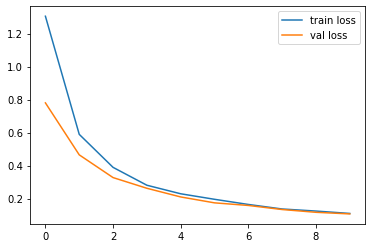

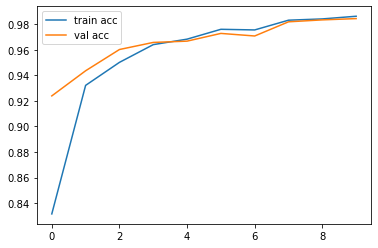

"import tensorflow as tf\n\nfrom keras.models import load_model\n\nmodel.save('facefeatures_new_model.h5')"

<Figure size 432x288 with 0 Axes>

In [30]:
r=model.history
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

'''import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')'''